In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("LifeExpect.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.isnull().sum() / df.shape[0]  #seeing if there is any null values in our data set, true = null False = not null 

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

<Axes: xlabel='Status', ylabel='count'>

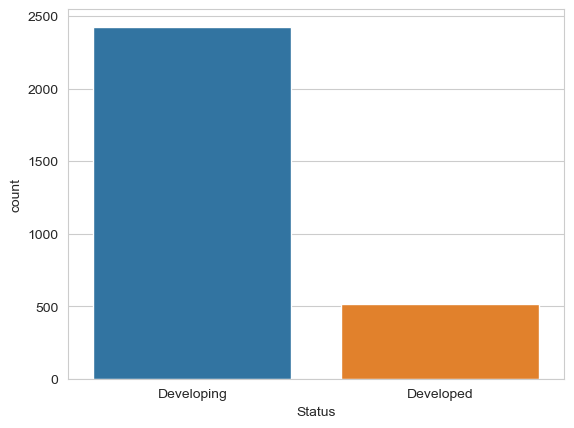

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Status', data=df)

In [6]:
df.describe() #supposed to show count, median std,??

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
life_expect = df.drop(['Country', 'Status', 'Year'], axis=1)

In [8]:
correlation = life_expect.corr()

In [9]:
#seeing how related each of the variables are to each other 

<Axes: >

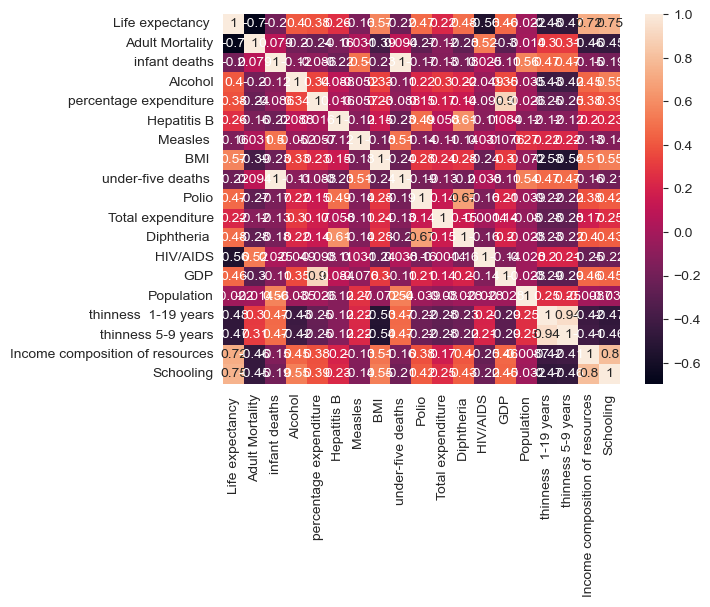

In [10]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [70]:
df.rename(columns=lambda x: x.replace('/', '-'), inplace=True)

In [71]:
#from the spread we see that the variables that are most correlated with life expectancy are adult mortality, HIV/AIDs, schooling, and income composition of resources 

In [72]:
df.shape 

(2938, 22)

In [73]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

<Axes: >

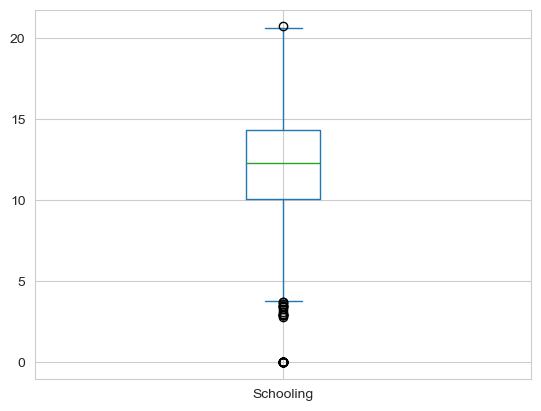

In [74]:
df['Schooling'].plot(kind='box')

<Axes: >

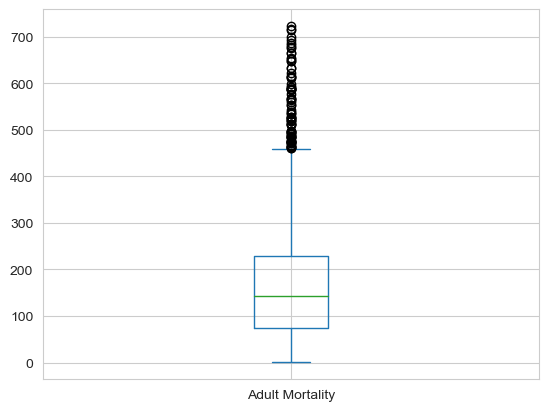

In [75]:
df['Adult Mortality'].plot(kind='box')

In [76]:
#df['HIVAIDS'].plot(kind='box')

<Axes: >

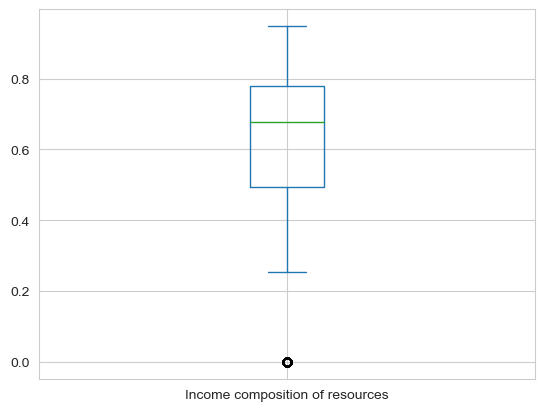

In [77]:
df['Income composition of resources'].plot(kind='box')

In [78]:
df['Year'].map(type)

0       <class 'int'>
1       <class 'int'>
2       <class 'int'>
3       <class 'int'>
4       <class 'int'>
            ...      
2933    <class 'int'>
2934    <class 'int'>
2935    <class 'int'>
2936    <class 'int'>
2937    <class 'int'>
Name: Year, Length: 2938, dtype: object

In [79]:
df['percentage expenditure'].map(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2933    <class 'float'>
2934    <class 'float'>
2935    <class 'float'>
2936    <class 'float'>
2937    <class 'float'>
Name: percentage expenditure, Length: 2938, dtype: object

In [80]:
np.percentile(df['infant deaths'], np.arange(0,100,10))

array([ 0.,  0.,  0.,  1.,  1.,  3.,  7., 14., 29., 58.])

In [81]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [82]:
df['Lifeexpectancy'].map(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
2933    <class 'float'>
2934    <class 'float'>
2935    <class 'float'>
2936    <class 'float'>
2937    <class 'float'>
Name: Lifeexpectancy, Length: 2938, dtype: object

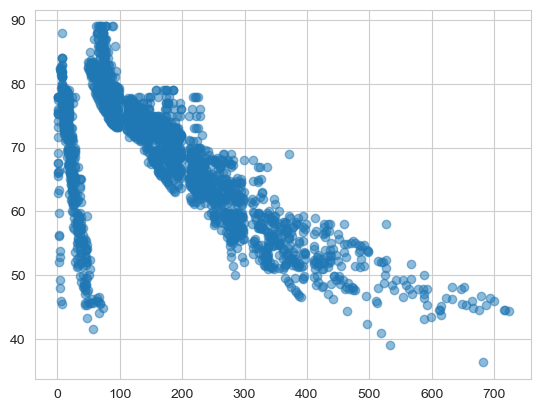

In [83]:
mortality = df['AdultMortality']
life_expect = df['Lifeexpectancy']
plt.scatter(mortality, life_expect, alpha=0.5)
plt.show()

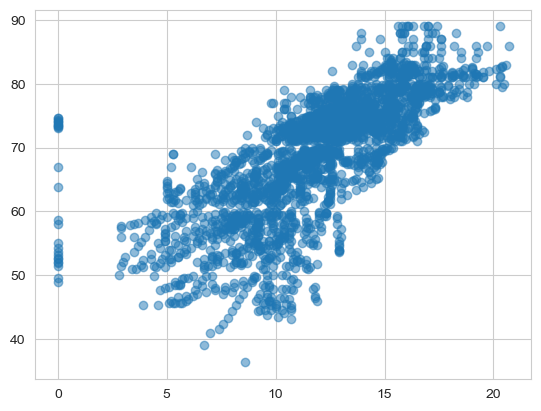

In [84]:
school = df['Schooling']
life_expect = df['Lifeexpectancy']
plt.scatter(school, life_expect, alpha=0.5)
plt.show()

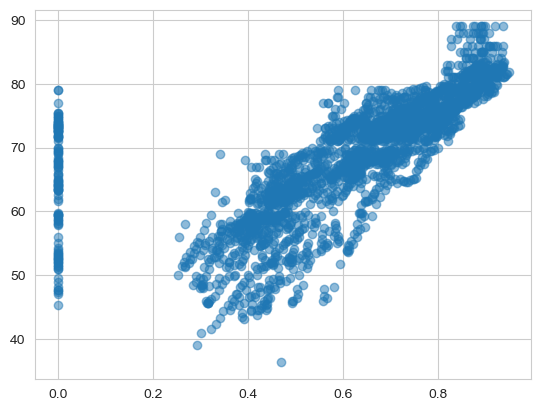

In [85]:
income = df['Incomecompositionofresources']
life_expect = df['Lifeexpectancy']
plt.scatter(income, life_expect, alpha=0.5)
plt.show()

In [86]:
#hiv_aids = df['HIV/AIDS']
#life_expect = df['Lifeexpectancy']
#plt.plot(hiv_aids, life_expect)
#plt.show()

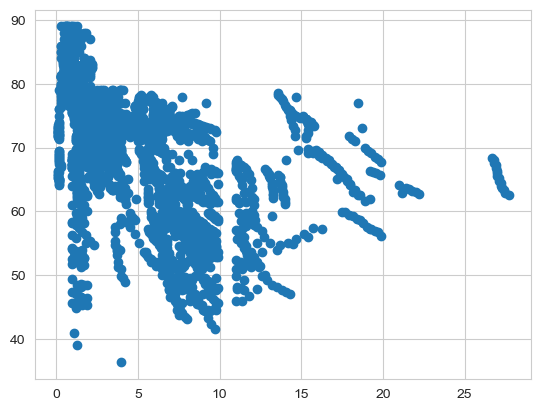

In [87]:
thinness = df['thinness1-19years']
life_expect = df['Lifeexpectancy']
plt.scatter(thinness, life_expect)
plt.show()

In [88]:
#y = "Lifeexpectancy"
#x = df.drop(y,axis=1)

In [89]:
#x.shape 

In [90]:
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.33, random_state=42)
#X_train
#y_train
#X_test
#y_test

In [91]:
from sklearn.model_selection import train_test_split 
df_train, df_test=train_test_split(df, test_size=.2,random_state=42)

<Axes: xlabel='Lifeexpectancy'>

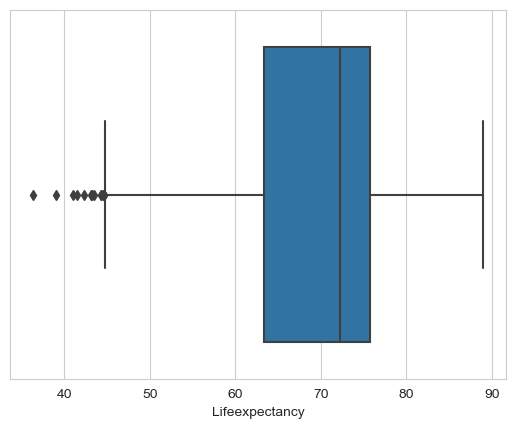

In [92]:
sns.boxplot(data=df_train,x='Lifeexpectancy',fliersize=5)

<Axes: xlabel='Lifeexpectancy', ylabel='Count'>

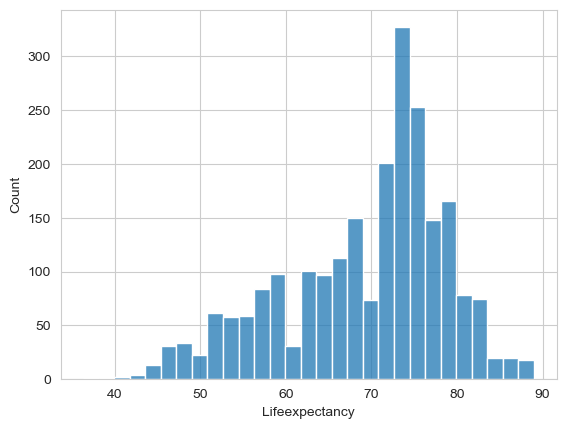

In [93]:
sns.histplot(data=df_train,x='Lifeexpectancy')

In [94]:
 
num_col=[]
cat_col=[]
for col in df_train.columns:
    if df_train[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)        

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


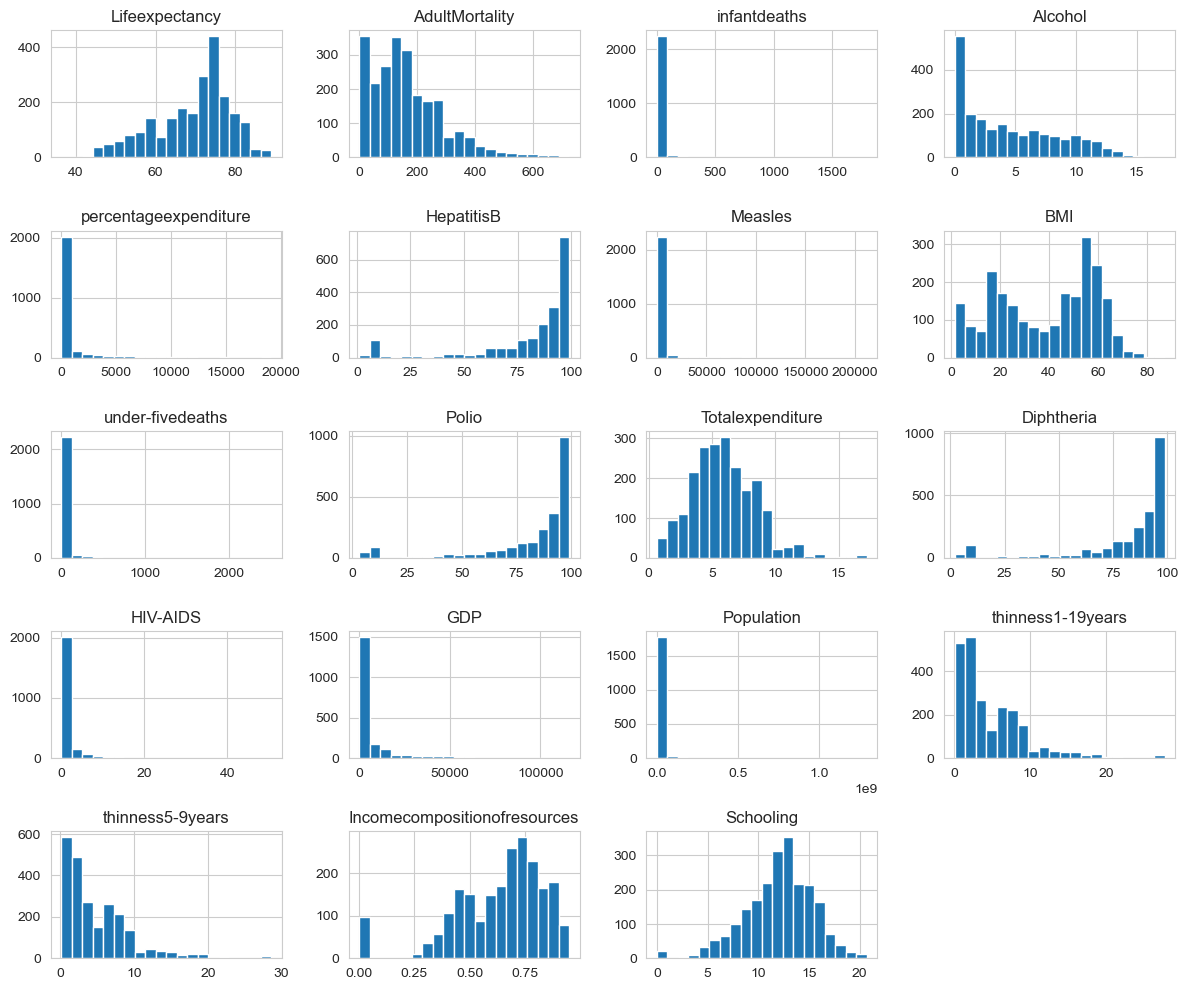

In [95]:
df_train[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

In [96]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [97]:
df.dropna(subset=['Lifeexpectancy'],inplace=True)

In [98]:
hep = df['HepatitisB'].mean()
print(hep)
df['HepatitisB'].fillna(hep, inplace=True)

80.96084210526315


In [99]:
fillAlcohol=df['Alcohol'].mean()
print(fillAlcohol)
df['Alcohol'].fillna(fillAlcohol,inplace=True)

4.614855575868373


In [100]:
po=df['Polio'].mean()
print(po)
df['Polio'].fillna(po, inplace=True)

82.54829838432451


In [101]:
tte = df['Totalexpenditure'].mean()
print(tte)
df['Totalexpenditure'].fillna(tte,inplace=True)

5.9301628423390085


In [102]:
diph=df['Diphtheria'].median()
print(diph)
df['Diphtheria'].fillna(diph,inplace=True)

93.0


In [103]:
dp = df['GDP'].mean()
print(dp)
df['GDP'].fillna(dp,inplace=True)

7494.210719388651


In [104]:
pl=df['Population'].mean()
print(pl)
df['Population'].fillna(pl,inplace=True)

12764541.774711035


In [105]:
tn1 = df['thinness1-19years'].mean()
print(tn1)
df['thinness1-19years'].fillna(tn1,inplace=True)

4.850621546961325


In [106]:
tn2=df['thinness5-9years'].mean()
print(tn2)
df['thinness5-9years'].fillna(tn2,inplace=True)

4.881422651933701


In [107]:
income=df['Incomecompositionofresources'].mean()
print(income)
df['Incomecompositionofresources'].fillna(income,inplace=True)

0.6274187138728323


In [108]:
school=df['Schooling'].mean()
print(school)
df['Schooling'].fillna(school,inplace=True)

11.9996387283237


In [109]:
df.duplicated().sum()
data= df.drop_duplicates()

In [110]:
#df.drop(['BMI'],axis=1)

In [111]:
#feature engineering 

In [112]:
X= df[['AdultMortality', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'GDP', 'Population', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']]
y= df['Lifeexpectancy']

In [113]:
#splitting our data into test and train 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [115]:
model=LinearRegression()

In [116]:
#building the regression model 

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
#fitting the model 

In [126]:
y_pred = model.predict(X_test)

In [120]:
#model evaluation 

In [121]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-quared: ", r2)
print("mse: ", mse)
print("mae: ", mae)
#/ What do each of these values mean?
#r2 how many of dependent variable can be explained by ind variable
#mse: how close a regression line is to a set of data points
#how far each data point is (either direction) from the line of best fit


R-quared:  0.7643178931409391
mse:  21.05688022866566
mae:  3.3618833674880295


In [122]:
#making predictions with the model 

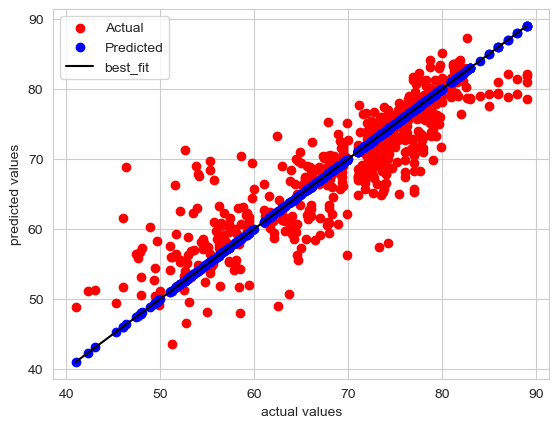

In [123]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='best_fit')
plt.legend()

In [124]:
coefficients = model.coef_
print("Coefficients:", coefficients)


Coefficients: [-3.10774599e-02  4.70550843e-02  3.24464657e-05 -1.48215553e-02
 -3.05554832e-03  3.19694378e-02  7.30142027e-02  5.45135190e-02
  4.72585453e-05  6.64831840e-09 -1.81025140e-01  8.07863268e+00
  6.84934834e-01]


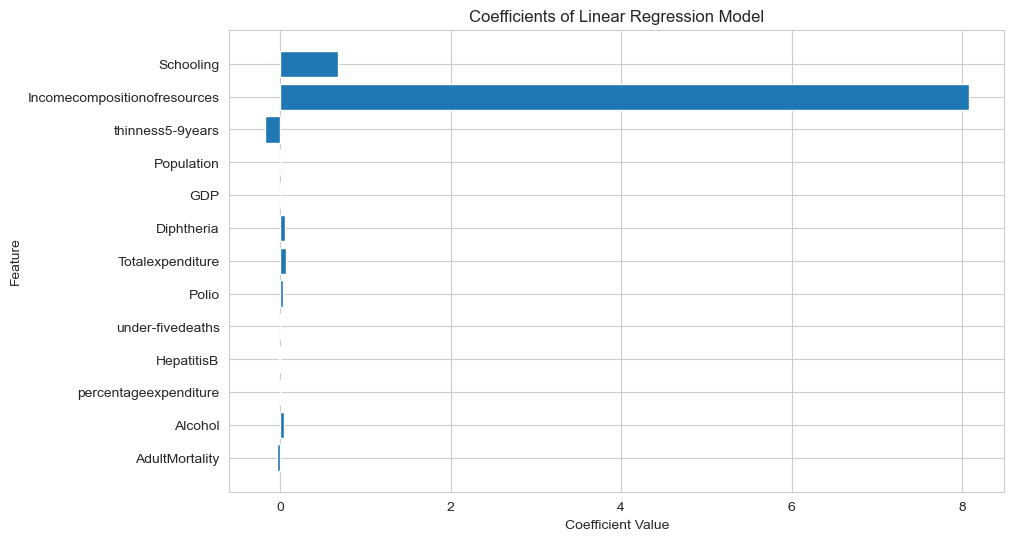

In [125]:
feature_names = ['AdultMortality', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'GDP', 'Population', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']  # Replace with actual feature names

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.grid(True)
plt.show()